# Gathring Data

## Importing necessary libraries

In [69]:
import pandas as pd
import requests 
import os
import glob 
import tweepy
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## Reading CSV file

In [2]:
twitter = pd.read_csv('twitter-archive-enhanced-2.csv')

In [3]:
twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## Downloading 'image-predictions.tsv'  programmatically using the Requests library 

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [5]:
with open (os.path.join(url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

### Making sure that the file downloaded 

In [6]:
os.listdir()

['.DS_Store',
 'twitter-archive-enhanced-2.csv',
 'Untitled.ipynb',
 'tweet-json.txt',
 'twitter_archive_master.csv',
 '.ipynb_checkpoints',
 'image-predictions.tsv']

### Reading the TSV file

In [7]:
image =  pd.read_csv('image-predictions.tsv', sep='\t')

In [8]:
image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Downloading 'tweet-json.txt' programmatically using the Requests library

In [9]:
url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
response = requests.get(url)
response

<Response [200]>

In [10]:
with open (os.path.join( url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

### Making sure that the file downloaded

In [11]:
os.listdir()

['.DS_Store',
 'twitter-archive-enhanced-2.csv',
 'Untitled.ipynb',
 'tweet-json.txt',
 'twitter_archive_master.csv',
 '.ipynb_checkpoints',
 'image-predictions.tsv']

### Reading the txt file using json and converting it to a data frame 

In [12]:
tmp = []

with open('tweet-json.txt') as file:
    for x in file:
        data = json.loads(x)
        tweet_id = data['id']
        retweet_count = data['retweet_count']
        favorite_count = data['favorite_count']
        
        tmp.append({'tweet_id':int(tweet_id),
                    'retweet_count': int(retweet_count),
                    'favorite_count': int(favorite_count)
                   })
tweet = pd.DataFrame(tmp)
    

In [13]:
tweet

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


# Assassing  

In [14]:
twitter 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [15]:
image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [16]:
tweet

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [17]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [18]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [20]:
twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [21]:
twitter[twitter.rating_denominator!=10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [22]:
image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [23]:
image.query("p1_dog == False and p2_dog == False and p3_dog == False")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


In [24]:
image[image.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


## Quality 


### Twitter
- Columns such as (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp) have many null values and will not be useful for the analysis. 
- Source and expanded_urls columns could not be analyzed so will be dropded.
- Rating_numerator and rating_denominator should be folat 
- Dogs named a or not should be as a null
- Erroneous datatypes (doggo, floofer, pupper and puppo columns)
- Rating_denominator not equal to 10
- Rating should be one column 


### Image
- The breed of dog was written in small and capital letters 
- There are 66 duplicated rows for image
- P1, p2, p3 should be one column for each breed and confidence level

# Tidiness

- Timestamp should be three columns 
- All data sets should be merge into one data set

# Cleaning 

In [25]:
twitter_clean = twitter.copy()
image_clean = image.copy()
tweet_clean = tweet.copy()

# Quality 

### Define
- Columns which are not be using for ananlysis will be droped using: drop() in pandas

### Code

In [26]:
print(list(twitter_clean))

['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']


In [27]:

twitter_clean = twitter_clean.drop(['in_reply_to_status_id',
                                    'in_reply_to_user_id',
                                    'source',
                                    'retweeted_status_id',
                                    'retweeted_status_user_id',
                                    'retweeted_status_timestamp', 
                                    'expanded_urls'], axis=1)

### Test

In [28]:
print(list(twitter_clean))

['tweet_id', 'timestamp', 'text', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']


### Define 
- Changing the type of (rating_numerator and rating_denominator) to float using astype()

### Code

In [29]:

twitter_clean[['rating_numerator', 'rating_denominator']] = twitter_clean[['rating_numerator', 'rating_denominator']].astype(float)



### Test

In [30]:
twitter_clean[['rating_numerator', 'rating_denominator']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rating_numerator    2356 non-null   float64
 1   rating_denominator  2356 non-null   float64
dtypes: float64(2)
memory usage: 36.9 KB


# Tidiness

### Define 
- Timestamp should be writtern as day-month-year and every one of them is in separate column. Should be converted first to datetime then sepratet them

### Code

In [31]:
twitter_clean['timestamp'] = pd.to_datetime(twitter_clean['timestamp'])

In [32]:
twitter_clean['day'] = twitter_clean['timestamp'].dt.day
twitter_clean['month'] = twitter_clean['timestamp'].dt.month
twitter_clean['year'] = twitter_clean['timestamp'].dt.year

In [33]:
twitter_clean = twitter_clean.drop(['timestamp'], axis=1)

### Test

In [34]:
twitter_clean.head(1)

,tweet_id,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,day,month,year
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None,None,None,None,1,8,2017


# Quality

### Define 
- Dogs named a or not should be as a null

### Code

In [35]:
twitter_clean['name'] = twitter_clean['name'].replace({'a':None, 'not': None})

### Test

In [36]:
twitter_clean.query("tweet_id == '881536004380872706'")

,tweet_id,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,day,month,year
56,881536004380872706,Here is a pupper approaching maximum borkdrive...,14.0,10.0,None,None,None,pupper,None,2,7,2017


### Define 
- Erroneous datatypes (doggo, floofer, pupper and puppo columns). Melt the doggo, floofer, pupper and puppo columns to dogs and stage column then drop dogs 

### Code

In [37]:
twitter_clean = pd.melt(twitter_clean, id_vars=['tweet_id',
                                                'year',
                                                'month',
                                                'day',
                                                'text',
                                                'rating_numerator',
                                                'rating_denominator',
                                                'name'], var_name='dogs', value_name='stage')

twitter_clean = twitter_clean.drop('dogs', axis=1)
twitter_clean = twitter_clean.sort_values('stage').drop_duplicates(subset='tweet_id', keep='last')

### Test

In [38]:
twitter_clean['stage'].value_counts()

None       1976
pupper      257
doggo        83
puppo        30
floofer      10
Name: stage, dtype: int64

In [39]:
twitter_clean.sample(5)

,tweet_id,year,month,day,text,rating_numerator,rating_denominator,name,stage
372,828381636999917570,2017,2,5,Meet Doobert. He's a deaf doggo. Didn't stop h...,14.0,10.0,Doobert,doggo
3276,756303284449767430,2016,7,22,Pwease accept dis rose on behalf of dog. 11/10...,11.0,10.0,None,None
3249,759446261539934208,2016,7,30,No no no this is all wrong. The Walmart had to...,10.0,10.0,None,None
2977,796116448414461957,2016,11,8,I didn't believe it at first but now I can see...,11.0,10.0,None,None
2906,804738756058218496,2016,12,2,This is Django. He accidentally opened the fro...,12.0,10.0,Django,None


### Define 
- Fixing data when rating_denominator not equal to 10 

### Code


In [40]:
twitter_clean = twitter_clean.assign(rating_denominator=10.0)

### Test

In [41]:
twitter_clean[twitter_clean.rating_denominator!=10.0]

,tweet_id,year,month,day,text,rating_numerator,rating_denominator,name,stage


### Define 
- The breed of dog was written in small and capital letters should be converted all to small letters using lower()


### Code

In [42]:
image_clean.p1 = image_clean.p1.str.lower()
image_clean.p2 = image_clean.p2.str.lower()
image_clean.p3 = image_clean.p3.str.lower()

### Test

In [43]:
sum(image_clean.p1.str.isupper()),sum(image_clean.p2.str.isupper()),sum(image_clean.p3.str.isupper())

(0, 0, 0)

### Define 
- Delete duplicated rows in image using drop_duplicates()

### Code

In [44]:
image_clean = image_clean.drop_duplicates(subset=['jpg_url'], keep='last')


### Test

In [45]:
image_clean[image_clean.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Define 
- Creating 1 column for image prediction and 1 column for confidence level using np.select() 

### Code

In [46]:
select = [(image_clean['p1_dog']==True),
          (image_clean['p2_dog']==True),
          (image_clean['p3_dog']==True)]

breed = [(image_clean['p1']),
        (image_clean['p2']),
        (image_clean['p3'])]

conf = [(image_clean['p1_conf']),
        (image_clean['p2_conf']),
        (image_clean['p3_conf'])]

image_clean['breed'] = np.select(select, breed, default= 'none')

image_clean['conf'] = np.select(select, conf, default= 0)

In [47]:
list(image_clean)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'breed',
 'conf']

In [48]:
image_clean = image_clean.drop(['p1','p1_conf','p1_dog',
                                'p2','p2_conf','p2_dog',
                                'p3','p3_conf','p3_dog'], axis=1)

### Test

In [49]:
image_clean.head()

,tweet_id,jpg_url,img_num,breed,conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


### Define 
- Rating must be in one column which will be rating_numerator/rating_denominator then these two columns will be droped.

### Code

In [50]:
twitter_clean['rating'] = (twitter_clean.rating_numerator/twitter_clean.rating_denominator)

In [51]:
twitter_clean = twitter_clean.drop(['rating_numerator','rating_denominator'], axis=1)

### Test

In [52]:
list(twitter_clean)

['tweet_id', 'year', 'month', 'day', 'text', 'name', 'stage', 'rating']

# Tidiness

### Define 
- All datasets should be merged into one dataset using merge() in pandas

### Code

In [55]:
tweet_clean

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [56]:
df_1 = pd.merge(twitter_clean, image_clean, how = 'left', on = ['tweet_id'])

In [57]:
df = pd.merge(df_1, tweet_clean, how = 'left', on = ['tweet_id'])

### Test

In [58]:
df

,tweet_id,year,month,day,text,name,stage,rating,jpg_url,img_num,breed,conf,retweet_count,favorite_count
0,667550904950915073,2015,11,20,RT @dogratingrating: Exceptional talent. Origi...,None,None,1.2,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1.0,vizsla,0.000081,37.0,0.0
1,667550882905632768,2015,11,20,RT @dogratingrating: Unoriginal idea. Blatant ...,None,None,0.5,https://pbs.twimg.com/media/CUObvUJVEAAnYPF.jpg,1.0,none,0.000000,34.0,0.0
2,667549055577362432,2015,11,20,Never seen dog like this. Breathes heavy. Tilt...,None,None,0.1,https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg,1.0,none,0.000000,2454.0,6138.0
3,667546741521195010,2015,11,20,Here is George. George took a selfie of his ne...,George,None,0.9,https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg,1.0,toy_poodle,0.787424,138.0,355.0
4,667544320556335104,2015,11,20,"This is Kial. Kial is either wearing a cape, w...",Kial,None,1.0,https://pbs.twimg.com/media/CUOYBbbWIAAXQGU.jpg,1.0,pomeranian,0.412893,568.0,917.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,825535076884762624,2017,1,29,Here's a very loving and accepting puppo. Appe...,None,puppo,1.4,https://pbs.twimg.com/media/C3TjvitXAAAI-QH.jpg,1.0,rottweiler,0.681495,19669.0,56413.0
2352,825120256414846976,2017,1,27,RT @dog_rates: Say hello to Pablo. He's one go...,Pablo,puppo,1.2,NaN,NaN,NaN,NaN,1483.0,0.0
2353,825026590719483904,2017,1,27,Say hello to Pablo. He's one gorgeous puppo. A...,Pablo,puppo,1.2,https://pbs.twimg.com/media/C3MVTeHWcAAGNfx.jpg,2.0,eskimo_dog,0.524454,1483.0,7020.0
2354,803773340896923648,2016,11,30,This is Diogi. He fell in the pool as soon as ...,Diogi,puppo,1.2,https://pbs.twimg.com/media/CyeTku-XcAALkBd.jpg,2.0,miniature_pinscher,0.817066,3220.0,11203.0


# Storing the data in a CSV file 

In [59]:
df.to_csv('twitter_archive_master.csv',index=False, encoding = 'utf-8')

# Insights

### 1
- golden_retriever is the most popular 

In [60]:
df['breed'].value_counts()

none                    318
golden_retriever        158
labrador_retriever      108
pembroke                 95
chihuahua                91
                       ... 
clumber                   1
standard_schnauzer        1
bouvier_des_flandres      1
irish_wolfhound           1
silky_terrier             1
Name: breed, Length: 114, dtype: int64

### 2
- clumbers have the most rating score

In [61]:
df.rating.describe()

count    2356.000000
mean        1.312649
std         4.587665
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: rating, dtype: float64

In [71]:
breed_mean = df.groupby('breed').mean()

In [72]:
breed_sorted = df_dog_type_mean['rating'].sort_values()

breed_sorted

breed
japanese_spaniel               0.500000
walker_hound                   0.900000
scotch_terrier                 0.900000
tibetan_terrier                0.925000
maltese_dog                    0.931579
                                 ...   
great_pyrenees                 1.466667
west_highland_white_terrier    1.468750
none                           1.653459
soft-coated_wheaten_terrier    2.080000
clumber                        2.700000
Name: rating, Length: 114, dtype: float64

### 3
- japanese_spaniel has the lowest avrage rating 

In [73]:
breed_sorted = df_dog_type_mean['rating'].sort_values()

breed_sorted

breed
japanese_spaniel               0.500000
walker_hound                   0.900000
scotch_terrier                 0.900000
tibetan_terrier                0.925000
maltese_dog                    0.931579
                                 ...   
great_pyrenees                 1.466667
west_highland_white_terrier    1.468750
none                           1.653459
soft-coated_wheaten_terrier    2.080000
clumber                        2.700000
Name: rating, Length: 114, dtype: float64

# Visualization
- The most rated are not the most retweeted

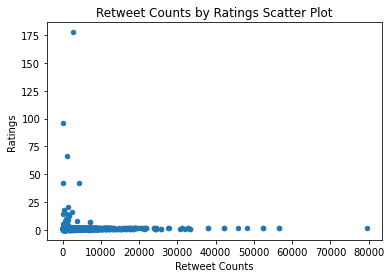

In [70]:
df.plot(x='retweet_count', y='rating', kind='scatter')
plt.xlabel('Retweet Counts')
plt.ylabel('Ratings')
plt.title('Retweet Counts by Ratings Scatter Plot')

fig = plt.gcf()
fig.savefig('output3.png',bbox_inches='tight');